# Linear Regression
Linear Regression is about training a model on some input data (e.g. Gender, Age) and a numeric output data (e.g. Salary). Then using some test data to see how well it works. That is, give a new input of a gender and age, can we predict the salary.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split # scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [71]:
# Random seed of 0 means different scenario each run. Use any other number (e.g. 123) to always return the same training results
seed = 0

In [72]:
# Read in some data
dataset = pd.read_csv('data/data.csv')
print(f"{len(dataset)} rows read")

169 rows read


In [73]:
# Show the first few rows
dataset.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [74]:
# Are there any rows with NaN (Not a Number)? These will cause errors:
nan_rows = dataset[dataset.isna().any(axis=1)]
nan_rows

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


In [75]:
# Remove them
# Assuming df is your DataFrame and nan_rows is the DataFrame with NaN rows
dataset = dataset.drop(nan_rows.index)

In [76]:
# Define which columns will be the imput
X = dataset[['Pulse']]

# Define which columns will be the output
Y = dataset[['Calories']]

In [77]:
# Split the dataset into 75% random columns for testing and the remaining 25% for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [78]:
print(f"""
Number of rows in each partition:
  x_train = {len(x_train):>4}
  x_test  = {len(x_test):>4}
  y_train = {len(y_train):>4}
  y_test  = {len(y_test):>4}
""")


Number of rows in each partition:
  x_train =  123
  x_test  =   41
  y_train =  123
  y_test  =   41



In [79]:
# Scale the data so that the range of one column in the input does not over-shadow another column of a different range.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Show first 5 rows
x_train[:5]

# Notice that x_train is no longer a dataframe but an array of arrays; e.g. an array of 300 rows, where each row is an 
# array of 3 numbers to represent the scaled 'Gender', 'Age', 'EstimatedSalary' columns.

array([[ 1.20293328],
       [-0.49127428],
       [-0.06772239],
       [-0.13831437],
       [ 0.56760544]])

In [80]:
# The training functions work on arrays; not dataframes, so we need to convert t_train to an array
# So get the values of the 0th column of y_train
y_train = y_train.iloc[:, 0].values # Strange syntax eh? Read about slicing and iloc.
y_train

array([ 124.2,  329.4,  110.4,  246. ,  310.2,  251. ,  466.4,  151.1,
        384. ,  380.3,  500. ,  382. ,  328. ,  800.4,  275. ,  243. ,
        953.2,  299. , 1000.1,  563.2,  351.7,  340. , 1034.4,  242. ,
        368.5,  273. ,  329.3,  229.4,  280.9,  500.4,  128.2,  300. ,
        189. ,  270. ,  263. ,  368.5,  275.8,  873.4,  367.6,  443. ,
        387.6,  643.1,  380.2,  379.3,  275.3,  334.5,  336.7,  282. ,
        215.2,  319.2,  238. ,  500.4,  282.4,  330.4,   77.7,  374. ,
       1115. ,  300. ,  234. ,  344.9,  345.3,  327.5,  382.8,  275. ,
        409.1,  127.4,  400. ,  298. ,  250.7,  124. ,  300. ,  321. ,
        400. ,  300. ,  816. ,  479. ,  308. ,  270.4,  397. ,  500.3,
        406. ,  361.9,  323. ,  193.9,   86.2,  180.1,  300. ,  450.7,
        339. ,  335. ,  300. ,  243. ,  277.4,  223. ,  335.4,  357.5,
        409.4,  361. ,  180.1,  500. ,  225.3,  344. ,  332.7,  290.8,
        304. , 1729. ,  241. ,  500. ,  240.9,  260.4,  286. , 1376. ,
      

In [81]:
algorithm = LinearRegression()
algorithm.fit(x_train, y_train)
algorithm.score(x_train, y_train)
# Now we have a trained model.

0.006476100369425364

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = algorithm.predict(x_test)
print(f"""
The curve that fits the data is: {algorithm.coef_}

Mean squared error = {mean_squared_error(y_test, y_pred):.2f}
Coefficient of determination: 1 is perfect prediction = {r2_score(y_test, y_pred):.2f}
""")


The curve that fits the data is: [-21.02716431]

Mean squared error = 81845.50
Coefficient of determination: 1 is perfect prediction = -0.08



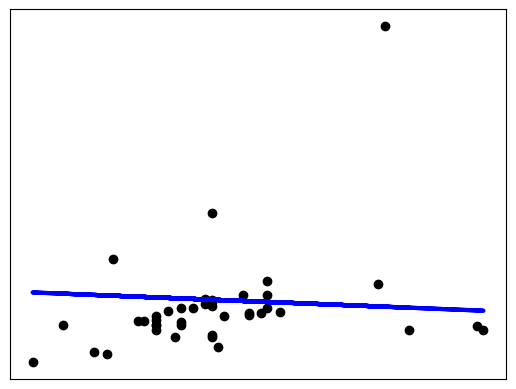

In [83]:
# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()